In [431]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [432]:
df=pd.read_csv('new.csv')


In [433]:
df.isnull().sum()

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
ERP      0
dtype: int64

In [434]:

#df_trn.to_csv('data3.csv', index=False)

In [435]:
df.head(2)

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253


In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MYCT    209 non-null    int64
 1   MMIN    209 non-null    int64
 2   MMAX    209 non-null    int64
 3   CACH    209 non-null    int64
 4   CHMIN   209 non-null    int64
 5   CHMAX   209 non-null    int64
 6   PRP     209 non-null    int64
 7   ERP     209 non-null    int64
dtypes: int64(8)
memory usage: 13.2 KB


In [437]:
X=df.drop(labels=['PRP'],axis=1)



In [438]:
y=df[['PRP']]

In [439]:
y

,PRP
0,198
1,269
2,220
3,172
4,132
...,...
204,42
205,46
206,52
207,67


In [440]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [441]:
X = preprocessor.fit_transform(X)

In [442]:

X.shape

(209, 7)

In [443]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((167, 7), (42, 7))

In [444]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [445]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 39.1027
- Mean Absolute Error: 23.2323
- R2 Score: 0.9205
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 48.6836
- Mean Absolute Error: 31.4062
- R2 Score: 0.9534


Lasso
Model performance for Training set
- Root Mean Squared Error: 39.5613
- Mean Absolute Error: 23.3080
- R2 Score: 0.9186
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 44.3251
- Mean Absolute Error: 29.6997
- R2 Score: 0.9614


Ridge
Model performance for Training set
- Root Mean Squared Error: 39.2771
- Mean Absolute Error: 23.2034
- R2 Score: 0.9198
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 45.2407
- Mean Absolute Error: 29.9833
- R2 Score: 0.9598


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 52.9254
- Mean Absolute Error: 22.8922
- R2 Score: 0.8543
---------

g:\computer hardware\venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 29.4348
- Mean Absolute Error: 11.7135
- R2 Score: 0.9549
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 72.1554
- Mean Absolute Error: 32.1996
- R2 Score: 0.8977


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 9.1814
- Mean Absolute Error: 2.2525
- R2 Score: 0.9956
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 92.7891
- Mean Absolute Error: 39.0382
- R2 Score: 0.8309


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 11.0107
- Mean Absolute Error: 6.2984
- R2 Score: 0.9937
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 82.1906
- Mean Absolute Error: 36.1546
- R2 Score: 0.8673


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 33.0418
- Mean Absolute Error: 29.0991
- R2 

g:\computer hardware\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [446]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Lasso,0.961406
2,Ridge,0.959795
0,Linear Regression,0.953442
4,Decision Tree,0.942633
5,Random Forest Regressor,0.897727
7,CatBoosting Regressor,0.867301
6,XGBRegressor,0.830871
8,AdaBoost Regressor,0.818538
3,K-Neighbors Regressor,0.752534


In [447]:
linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 95.34


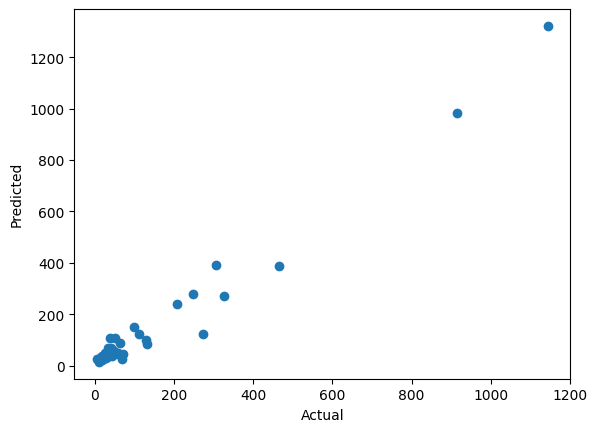

In [448]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

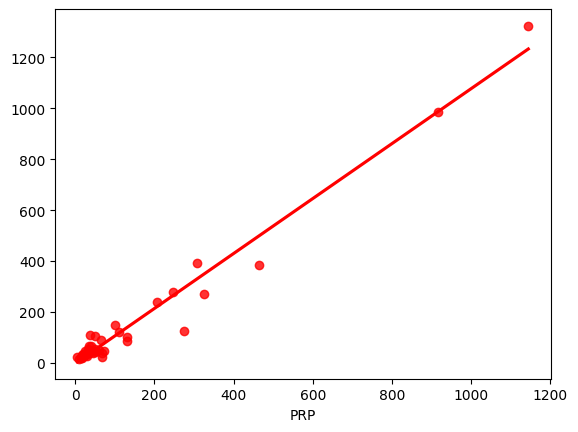

In [449]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [450]:
import pandas as pd

# Ensure y_test is a one-dimensional array
y_test_values = y_test.values.flatten() if isinstance(y_test, pd.DataFrame) else y_test.flatten()

# Ensure y_pred is a one-dimensional array
y_pred_values = y_pred.flatten() if isinstance(y_pred, pd.DataFrame) else y_pred.flatten()

# Create the DataFrame pred_df
pred_df = pd.DataFrame({'Actual Value': y_test_values, 'Predicted Value': y_pred_values, 'Difference': y_test_values - y_pred_values})

# Display pred_df
print(pred_df)

print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

    Actual Value  Predicted Value  Difference
0            274       124.818253  149.181747
1             30        29.448628    0.551372
2             22        29.501290   -7.501290
3            915       984.948941  -69.948941
4             16        24.183032   -8.183032
5            326       269.955700   56.044300
6             72        45.705555   26.294445
7              6        25.276281  -19.276281
8           1144      1322.437657 -178.437657
9            208       238.529616  -30.529616
10            65        89.573736  -24.573736
11           130       101.514989   28.485011
12            52        48.175503    3.824497
13            45        49.043295   -4.043295
14            35        66.598334  -31.598334
15            36        37.987241   -1.987241
16            51       106.990817  -55.990817
17            31        36.878592   -5.878592
18           100       150.925673  -50.925673
19           132        85.457801   46.542199
20            50        55.815065 

In [451]:
model_list

['Linear Regression',
 'Lasso',
 'Ridge',
 'K-Neighbors Regressor',
 'Decision Tree',
 'Random Forest Regressor',
 'XGBRegressor',
 'CatBoosting Regressor',
 'AdaBoost Regressor']

In [452]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)


Shape of y_test: (42, 1)
Shape of y_pred: (42, 1)


In [453]:
# Ensure y_test is a one-dimensional array
y_test_values = y_test.values.flatten() if isinstance(y_test, pd.DataFrame) else y_test.flatten()

# Ensure y_pred is a one-dimensional array
y_pred_values = y_pred.flatten() if isinstance(y_pred, pd.DataFrame) else y_pred.flatten()
